<a href="https://colab.research.google.com/github/amritavarshini786/lung_cancer/blob/main/Copy_of_lung_cancer_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/MyDrive/survey lung cancer.csv'

df = pd.read_csv(file_path)
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1  

In [ ]:
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
df.duplicated().sum()

np.int64(33)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['LUNG_CANCER']=encoder.fit_transform(df['LUNG_CANCER'])
df['GENDER']=encoder.fit_transform(df['GENDER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [ ]:
con_col = ['AGE']
cat_col=[]
for i in df.columns:
    if i!='AGE':
        cat_col.append(i)

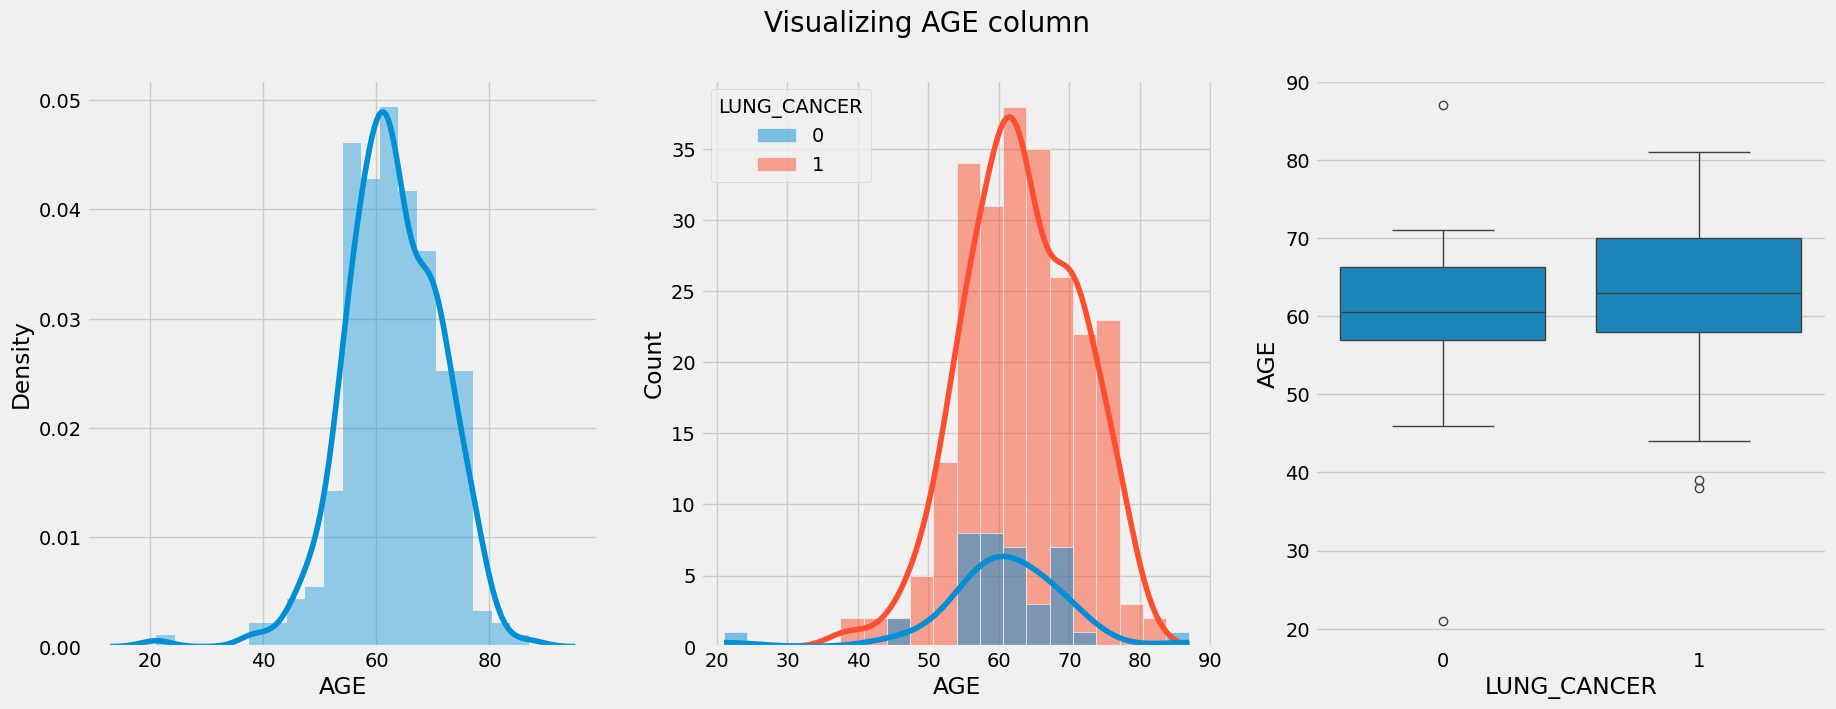

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(20,7))
sns.distplot(df['AGE'],ax=ax[0])
sns.histplot(data =df,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True)
sns.boxplot(x=df['LUNG_CANCER'],y=df['AGE'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=20)
plt.savefig("image.png")
plt.show()

Text(0.5, 0.98, 'Visualizing Categorical Columns')

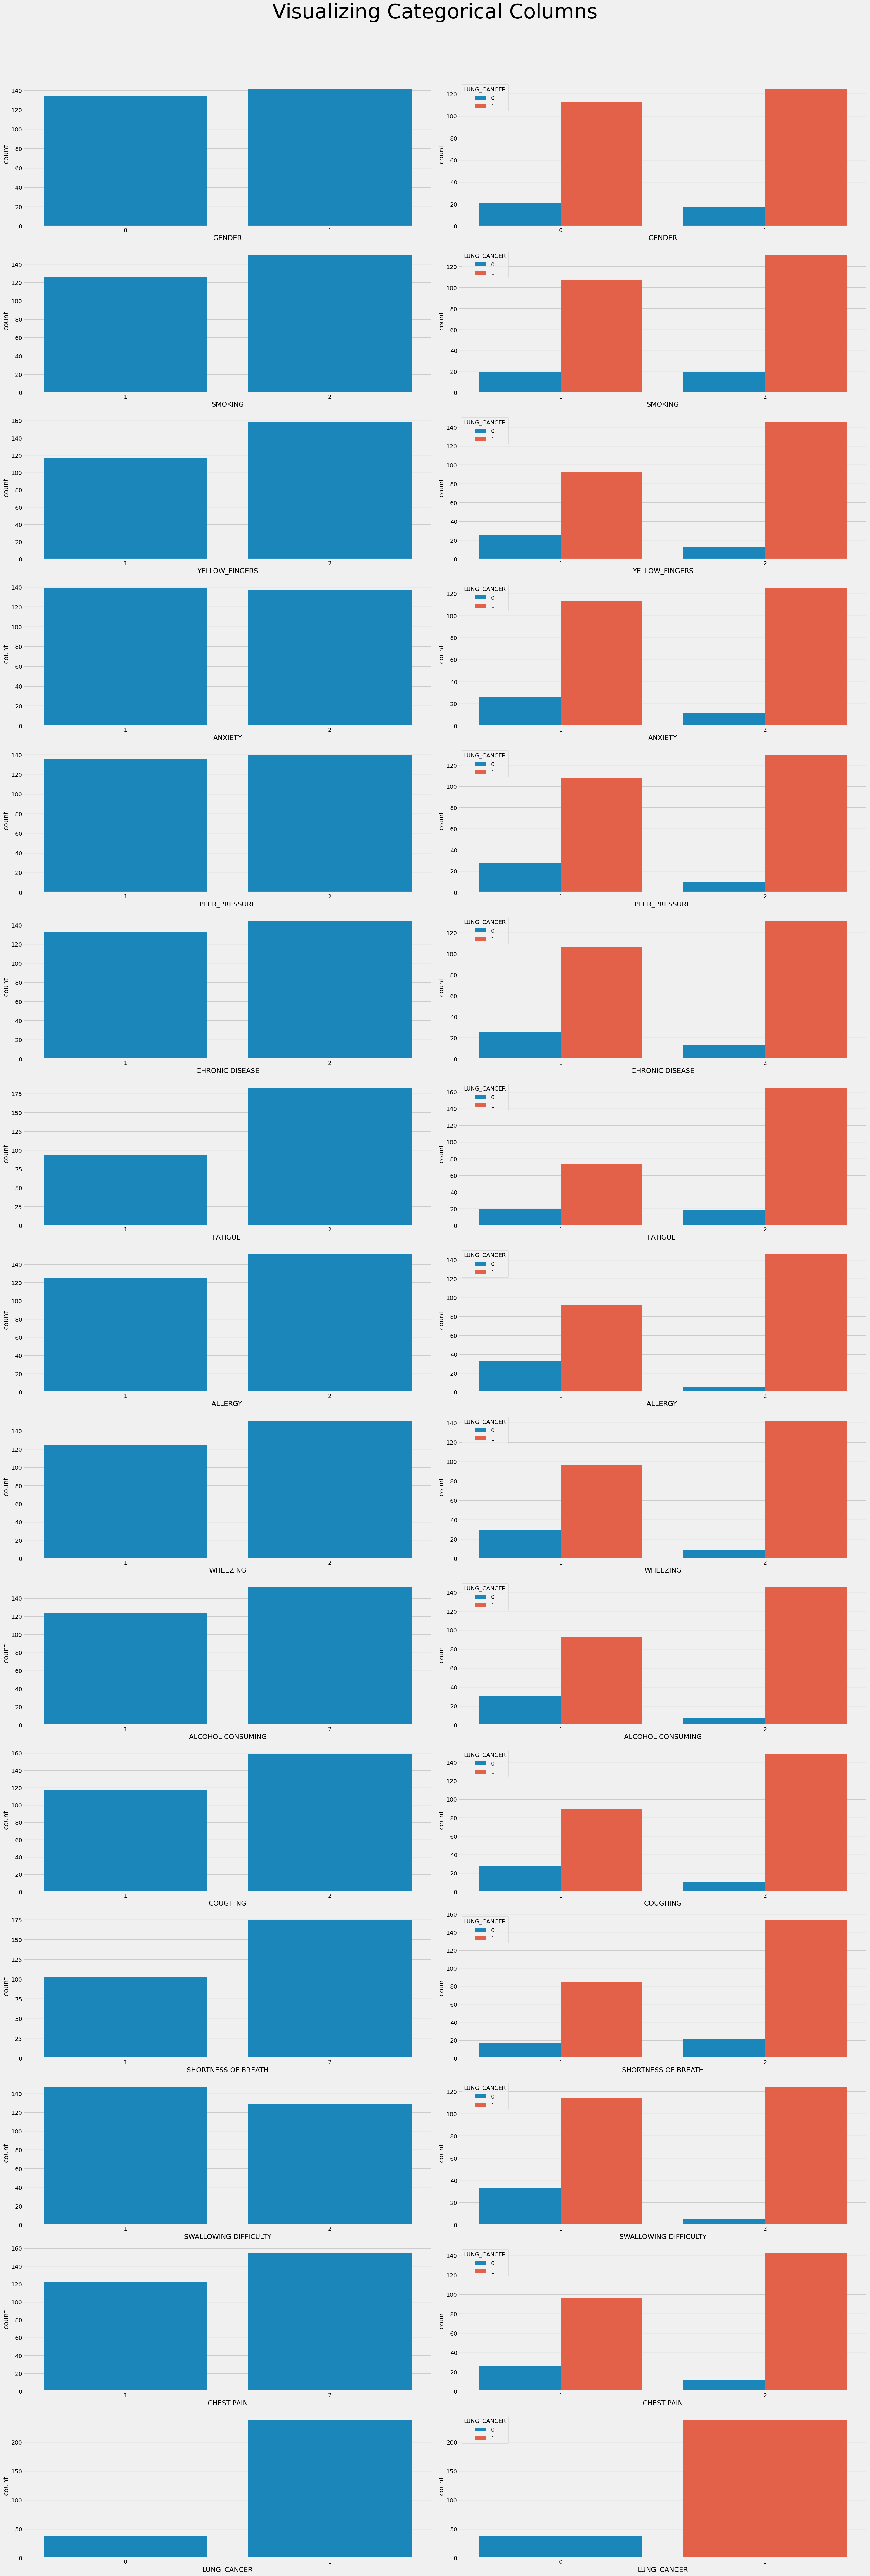

In [ ]:
fig,ax = plt.subplots(15,2,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.countplot(data=df,x=i,ax=ax[index,0])
    sns.countplot(data=df,x=i,ax=ax[index,1],hue='LUNG_CANCER')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Categorical Columns",fontsize=50)

In [ ]:
X=df.drop(['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']

In [ ]:
for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0


In [ ]:
from imblearn.over_sampling import RandomOverSampler
X_over,y_over=RandomOverSampler().fit_resample(X,y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=42,test_size=0.2,stratify=y_over)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (380, 15)
Test shape: (96, 15)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train['AGE']=scaler.fit_transform(X_train[['AGE']])
X_test['AGE']=scaler.transform(X_test[['AGE']])
X_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
311,0,0.035730,0,0,0,0,1,1,0,0,0,0,1,0,0
116,0,-0.660556,0,1,1,1,0,0,1,0,1,0,0,1,1
45,1,1.196208,1,1,1,1,1,1,0,1,1,1,1,1,1
279,1,0.732017,1,0,1,0,0,1,0,0,0,0,0,0,0
94,1,-1.588937,1,0,0,0,1,1,1,0,1,1,1,1,1


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

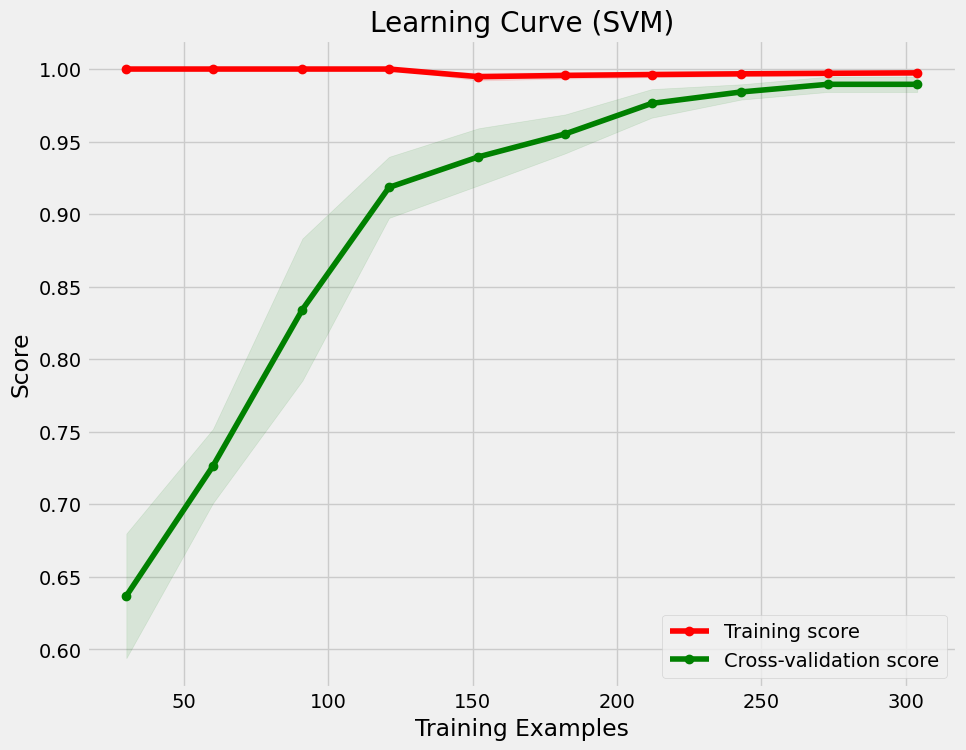

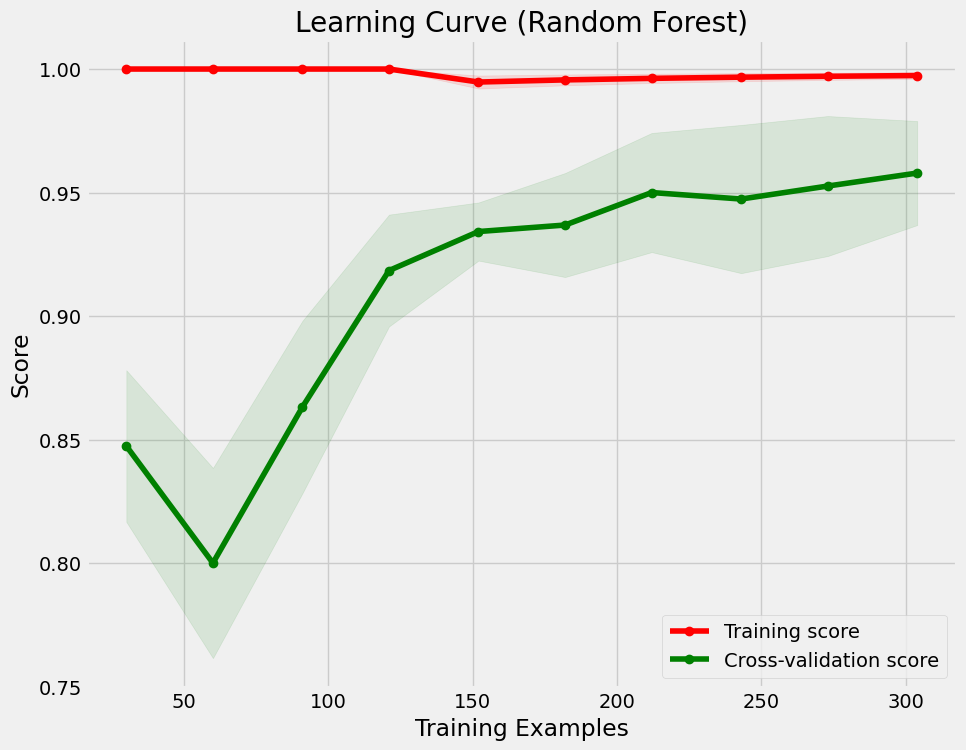

In [ ]:

from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

def plot_learning_curve(estimator, title, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure(figsize=(10, 8))
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")

    # Save the plot using the title as the filename (remove spaces)
    filename = title.replace(" ", "_") + ".png"
    plt.savefig(filename)
    plt.show()

# Example usage:
plot_learning_curve(SVC(gamma=10, C=100, probability=True),
                    "Learning Curve (SVM)", X_train, y_train)

plot_learning_curve(RandomForestClassifier(n_estimators=100, random_state=42),
                    "Learning Curve (Random Forest)", X_train, y_train)


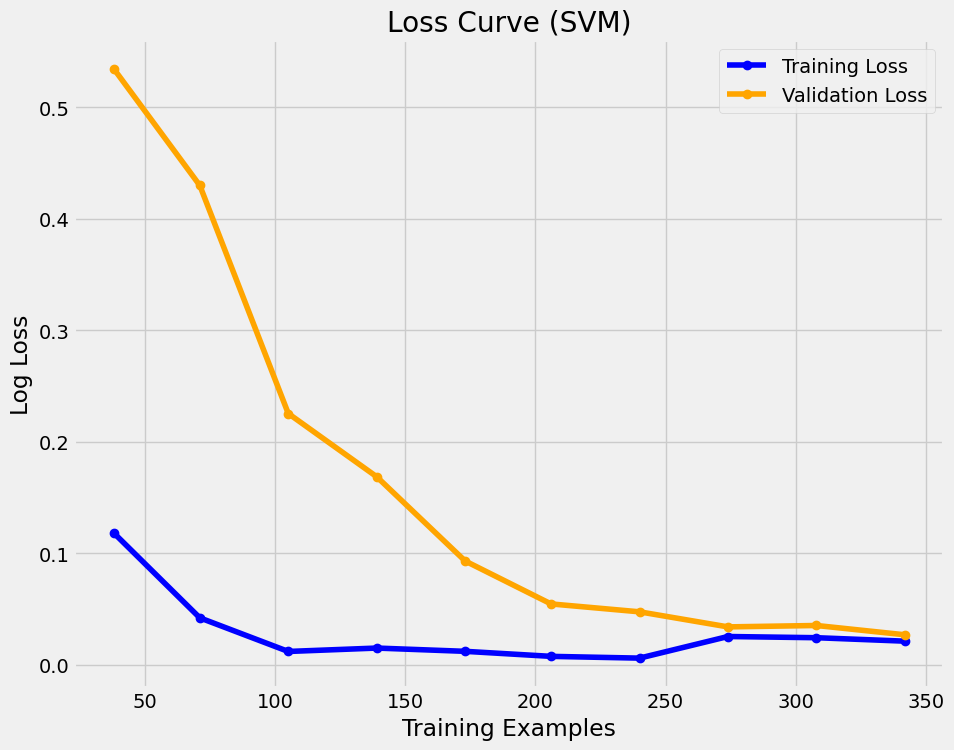

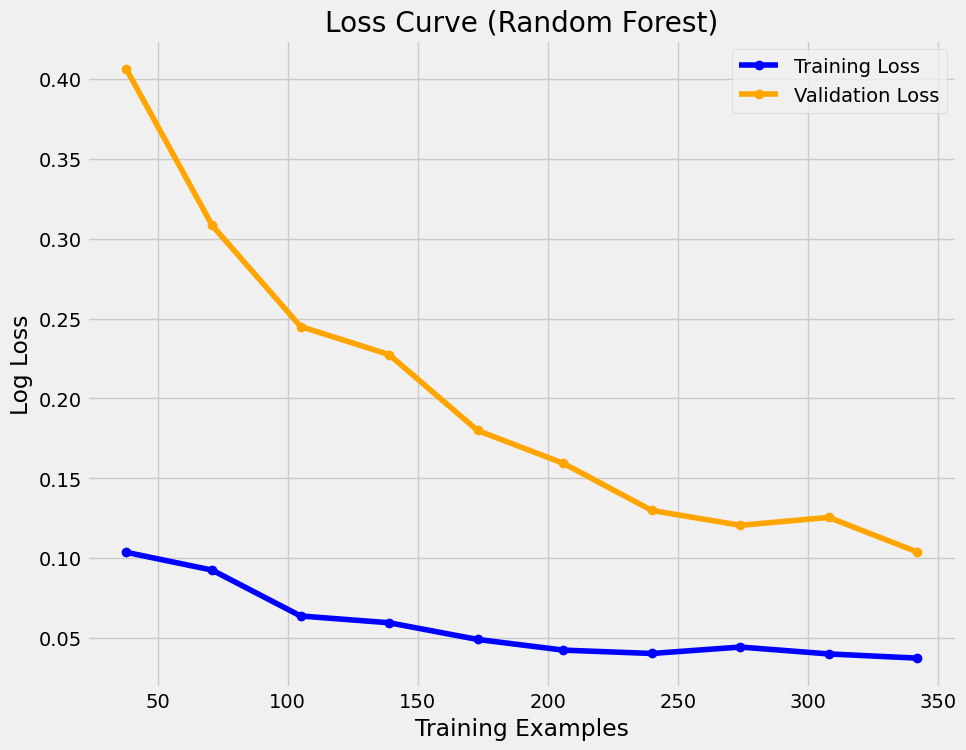

In [ ]:

from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

def plot_loss_curve(estimator, title, X, y, cv=5, train_sizes=np.linspace(0.1, 0.9, 10)):
    train_losses = []
    val_losses = []
    train_sizes_list = []

    for train_size in train_sizes:
        X_train_partial, _, y_train_partial, _ = train_test_split(X, y, train_size=train_size, random_state=42)
        estimator.fit(X_train_partial, y_train_partial)

        train_pred_prob = estimator.predict_proba(X_train_partial)
        val_pred_prob = estimator.predict_proba(X_test)

        train_loss = log_loss(y_train_partial, train_pred_prob)
        val_loss = log_loss(y_test, val_pred_prob)

        train_sizes_list.append(len(X_train_partial))
        train_losses.append(train_loss)
        val_losses.append(val_loss)

    plt.figure(figsize=(10, 8))
    plt.plot(train_sizes_list, train_losses, 'o-', color="blue", label="Training Loss")
    plt.plot(train_sizes_list, val_losses, 'o-', color="orange", label="Validation Loss")
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Log Loss")
    plt.legend(loc="best")
    filename = title.replace(" ", "_") + ".png"
    plt.savefig(filename)
    plt.show()

# Plot loss curve for SVM
plot_loss_curve(SVC(gamma=10, C=100, probability=True), "Loss Curve (SVM)", X_train, y_train)

# Plot loss curve for Random Forest
plot_loss_curve(RandomForestClassifier(n_estimators=100, random_state=42), "Loss Curve (Random Forest)", X_train, y_train)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        48

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96


Best Parameters of SVC model is : {'gamma': 100, 'C': 100}



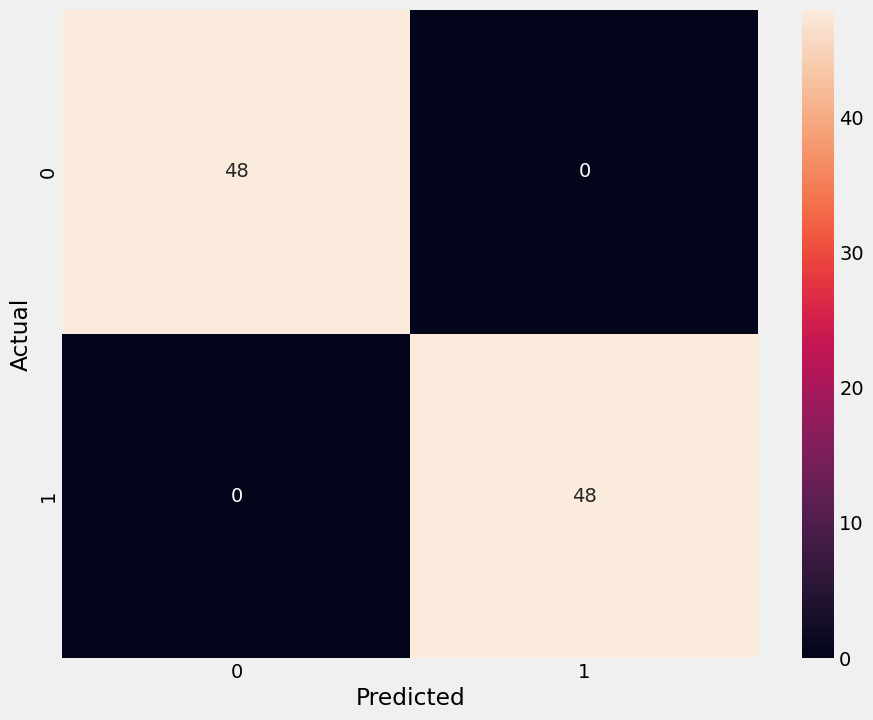

In [ ]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(10,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))
print(f'\nBest Parameters of SVC model is : {rcv.best_params_}\n')

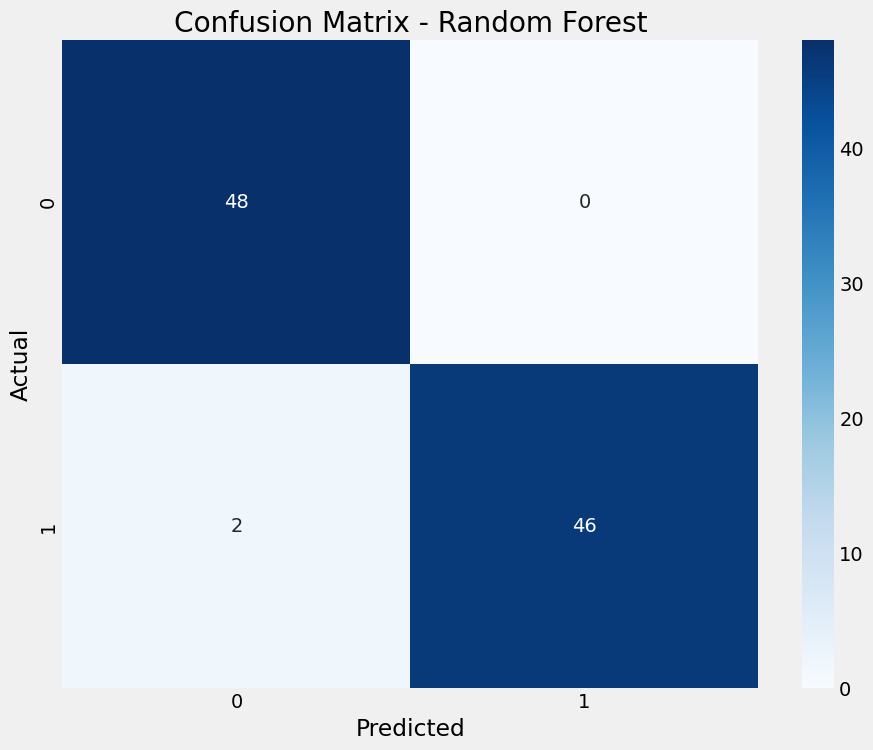

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.96      0.98        48

    accuracy                           0.98        96
   macro avg       0.98      0.98      0.98        96
weighted avg       0.98      0.98      0.98        96


Best Parameter: {'n_estimators': 150}



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Parameter grid and model training
param_grid = {
    'n_estimators': [50, 75, 100, 150, 200, 300],
}
rcv = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
rcv.fit(X_train, y_train)

# Predict and evaluate
y_pred_rcv = rcv.predict(X_test)
confusion_rcv = confusion_matrix(y_test, y_pred_rcv)

# Plot and save confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_rcv, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")

# Save the heatmap image
plt.savefig("Confusion_Matrix_RandomForest.png")
plt.show()

# Print results
print(classification_report(y_test, y_pred_rcv))
print(f'\nBest Parameter: {rcv.best_params_}\n')


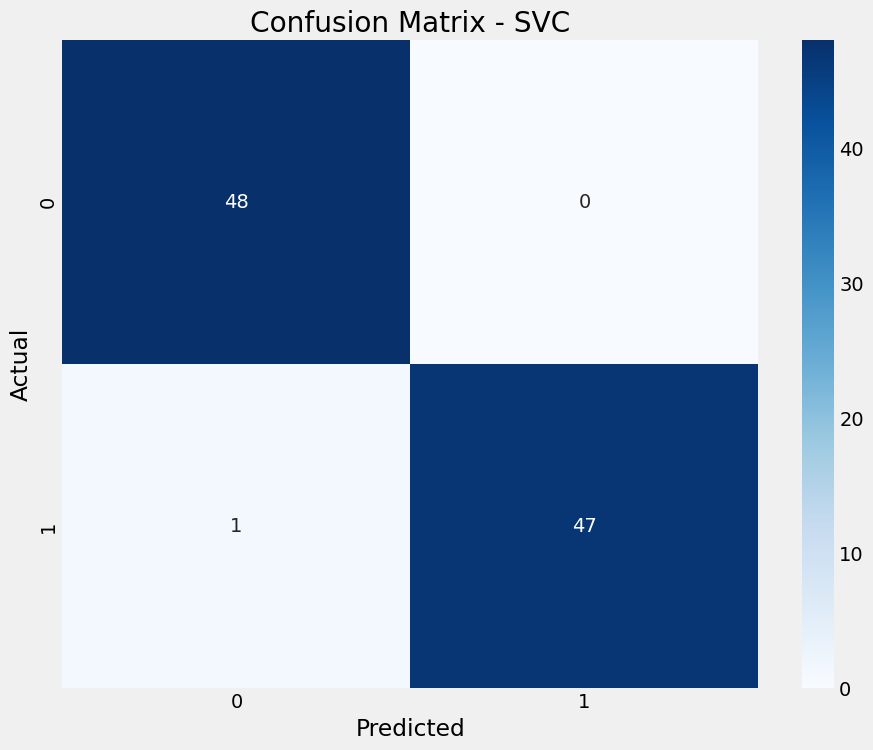

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.98      0.99        48

    accuracy                           0.99        96
   macro avg       0.99      0.99      0.99        96
weighted avg       0.99      0.99      0.99        96



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train the model
model = SVC(gamma=10, C=100)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svc = model.predict(X_test)
confusion_svc = confusion_matrix(y_test, y_pred_svc)

# Plot and save confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_svc, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVC")

# Save the heatmap image
plt.savefig("Confusion_Matrix_SVC_Manual.png")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_svc))


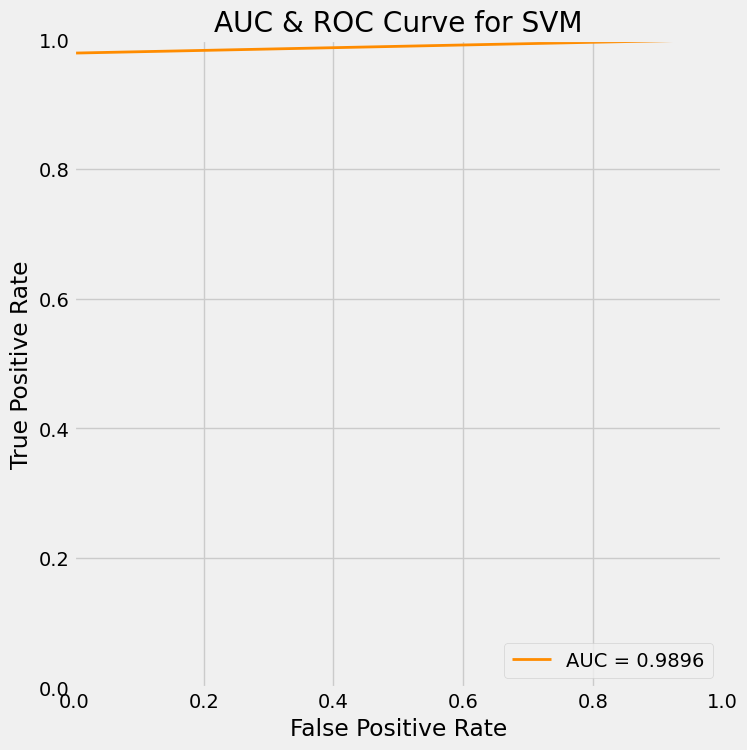

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Calculate AUC and ROC values
auc = metrics.roc_auc_score(y_test, y_pred_svc)
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred_svc)

# Plot ROC Curve
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve for SVM")
plt.plot(false_positive_rate, true_positive_rate, color='darkorange', lw=2, label=f"AUC = {auc:.4f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

# Save the plot
plt.savefig("ROC_Curve_SVM.png")
plt.show()


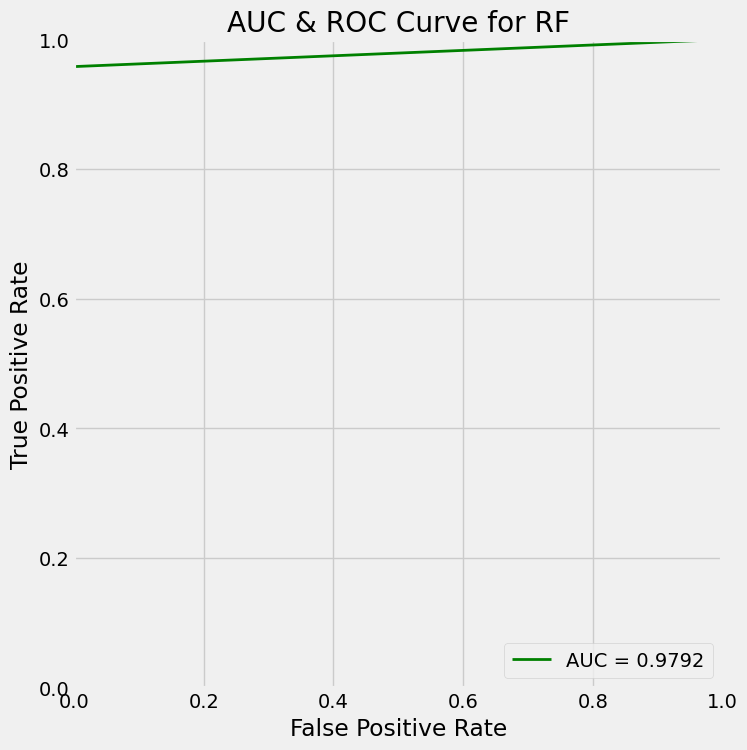

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Calculate AUC and ROC values
auc = metrics.roc_auc_score(y_test, y_pred_rcv)
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred_rcv)

# Plot ROC Curve
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve for RF")
plt.plot(false_positive_rate, true_positive_rate, color='green', lw=2, label=f"AUC = {auc:.4f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

# Save the plot
plt.savefig("ROC_Curve_RF.png")
plt.show()
